<a href="https://colab.research.google.com/github/AlinaMidhath/ML-projects/blob/main/HeartDiseasePred_logisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***:HEART DISEASE PREDICTION USING LOGISTIC REGRESSION***




The 14 attributes are:

1.age

2.sex

3.chest pain type (4 values)

4.resting blood pressure

5.serum cholestoral in mg/dl

6.fasting blood sugar > 120 mg/dl

7.resting electrocardiographic results (values 0,1,2)

8.maximum heart rate achieved

9.exercise induced angina

10.oldpeak = ST depression induced by exercise relative to rest

11.the slope of the peak exercise ST segment

12.number of major vessels (0-3) colored by flourosopy

13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14.target:0-->healthy heart , 1 ---> defective heart

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hd= pd.read_csv('/content/heart[1].csv')
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Data Visualization**

<Axes: >

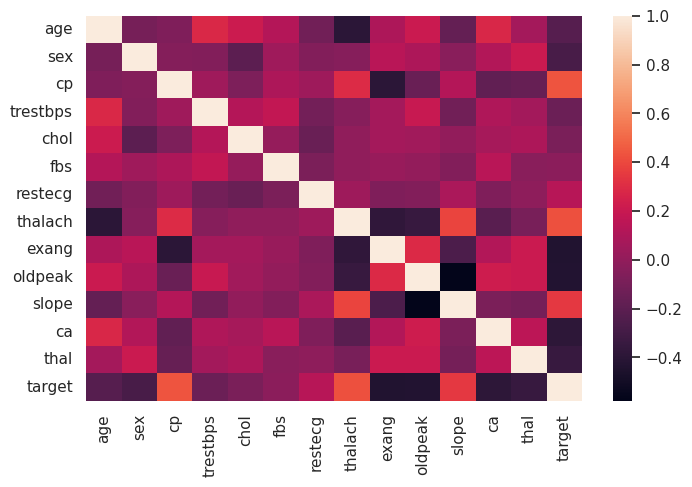

In [ ]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.heatmap(hd.corr())

<Axes: xlabel='cp', ylabel='count'>

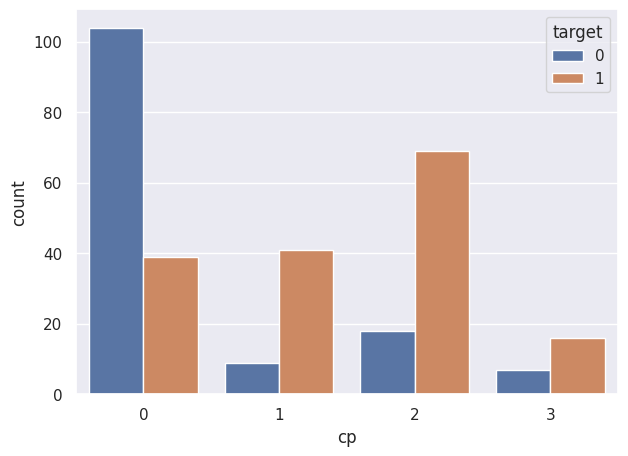

In [ ]:
sns.set(rc = {'figure.figsize':(7, 5)})
sns.countplot(x = 'cp' , hue= 'target' , data =hd)

<Axes: xlabel='slope', ylabel='count'>

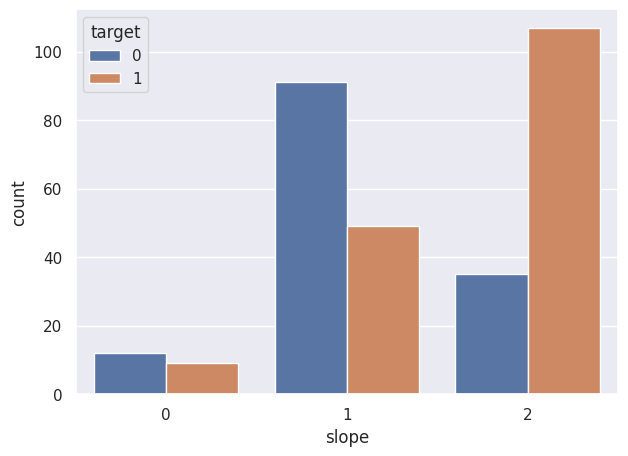

In [ ]:
sns.set(rc = {'figure.figsize':(7, 5)})
sns.countplot(x = 'slope' , hue= 'target' , data =hd)

<Axes: xlabel='thalach', ylabel='count'>

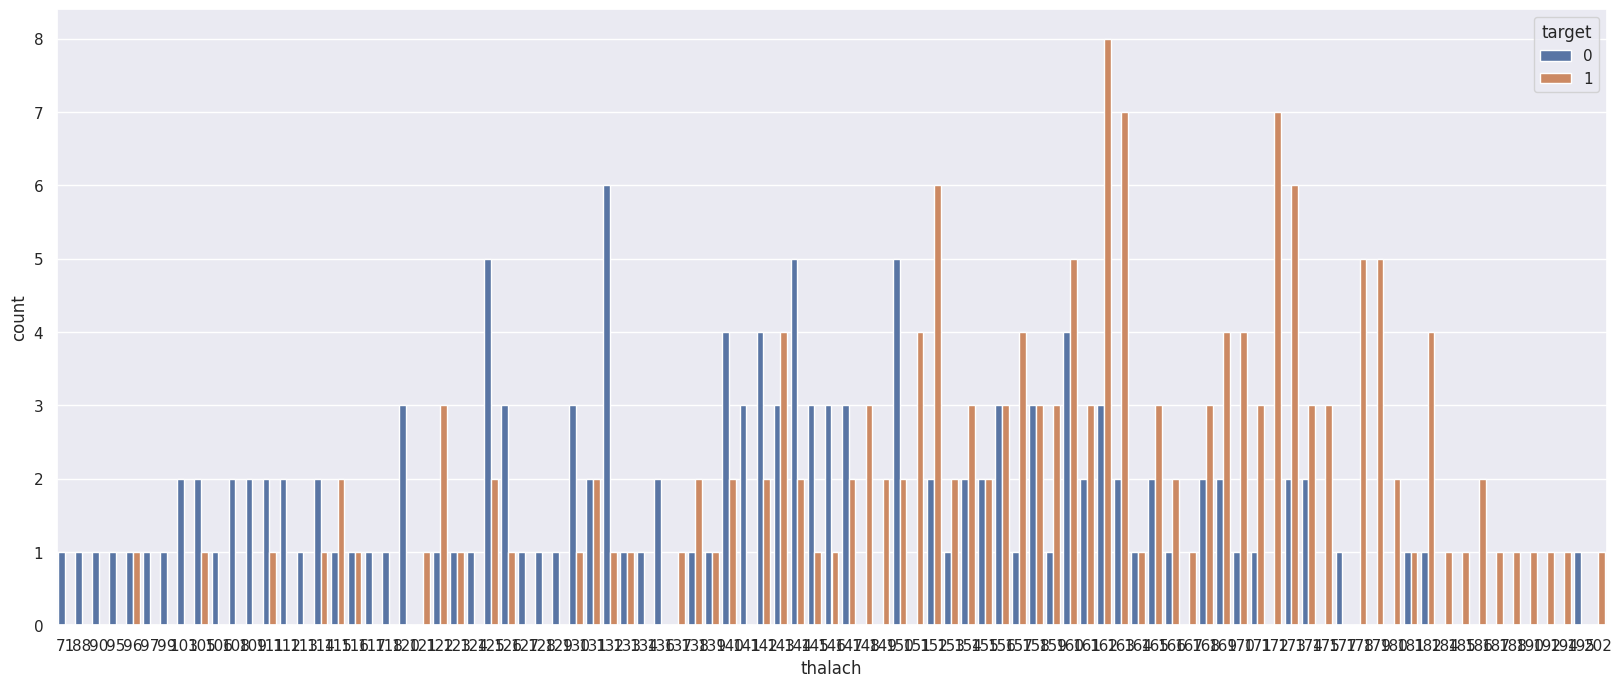

In [ ]:
sns.set(rc = {'figure.figsize':(20, 8)})
sns.countplot(x = 'thalach' , hue= 'target' , data =hd)

**Splitting the data  into independent(x) and dependent variables(y)**

In [ ]:
X = hd[['cp','thalach','slope']]
#X=hd.drop('target', axis =1) # we can take this also
y = hd['target']
print(X)
print(y)

     cp  thalach  slope
0     3      150      0
1     2      187      0
2     1      172      2
3     1      178      2
4     0      163      2
..   ..      ...    ...
298   0      123      1
299   3      132      1
300   0      141      1
301   0      115      1
302   1      174      1

[303 rows x 3 columns]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


**X = hd[ ['cp' , 'thalach' , 'slope'] ]**



*Here we are taking cp thalac and slope in X because we have seen in heat map that,these three variables are more related to the target which is our dependent variable*

**Splitting the data into training and testing set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train ,y_test =train_test_split(X,y  , test_size = 0.20 , random_state = 2)

**Fitting the training data in logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

**Making prediction on training dataset**

In [ ]:
X_train_prediction = model.predict(X_train)
X_train_prediction

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0])

**Calculating the accuracy of training data set**

In [ ]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7396694214876033


**Making prediction on test dataset**

In [ ]:
X_test_prediction = model.predict(X_test)
X_test_prediction

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

**Calculating the accuracy of test data set**

In [ ]:
from sklearn.metrics import accuracy_score
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of testing data : ', test_data_accuracy)


Accuracy score of testing data :  0.7704918032786885


**Using confusion matrix to calculate accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , X_test_prediction)
cm

array([[23,  9],
       [ 5, 24]])

In [ ]:
23+9+5+24

61

In [ ]:
23+24

47

In [ ]:
print('accuracy of test data set is : ',47/61)

accuracy of test data set is :  0.7704918032786885


**Making the Predictions**

In [ ]:
# input_data=(3,150,0)

# #change input_data into numpy array
# input_data_as_nparray = np.array(input_data)

# #reshaping the np array to tell the model that we want to predict the target for only one instance not the complete dataset
# input_data_reshaped = input_data_as_nparray.reshape(1,-1)

# pred = model.predict(input_data_reshaped)
# print(pred)

# if(pred[0]== 0):
#   print('The person does not have a Heart Disease')
# else:
#   print('The person has Heart Disease')